<a href="https://colab.research.google.com/github/cs156/cs156b-proj-group-23/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import urllib.request, json 
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

Upload outbreak_us.json

In [ ]:
with open('outbreak_us.json') as json_file:
  data = json.load(json_file)

variants_of_concern = ['B.1.1.7', 'P.1', 'B.1.351']

variant_props_time = {}
for d in data:
  if d['label'] not in variants_of_concern:
    continue
  variant_props_time[d['label']] = []

  for p in d['data']:
    variant_props_time[d['label']].append([p['date'], p['proportion']])

print(variant_props_time['B.1.1.7'])

[['2020-08-24', 0.0029940119760479044], ['2020-08-25', 0.0015267175572519084], ['2020-08-26', 0.0010834236186348862], ['2020-08-27', 0.0008460236886632825], ['2020-08-28', 0.0007047216349541931], ['2020-08-29', 0.0006443298969072164], ['2020-08-30', 0.0006146281499692685], ['2020-08-31', 0], ['2020-09-01', 0], ['2020-09-02', 0], ['2020-09-03', 0], ['2020-09-04', 0], ['2020-09-05', 0], ['2020-09-06', 0], ['2020-09-07', 0], ['2020-09-08', 0], ['2020-09-09', 0], ['2020-09-10', 0], ['2020-09-11', 0], ['2020-09-12', 0], ['2020-09-13', 0], ['2020-09-14', 0], ['2020-09-15', 0], ['2020-09-16', 0], ['2020-09-17', 0], ['2020-09-18', 0], ['2020-09-19', 0], ['2020-09-20', 0], ['2020-09-21', 0], ['2020-09-22', 0], ['2020-09-23', 0], ['2020-09-24', 0], ['2020-09-25', 0], ['2020-09-26', 0], ['2020-09-27', 0], ['2020-09-28', 0], ['2020-09-29', 0], ['2020-09-30', 0], ['2020-10-01', 0], ['2020-10-02', 0], ['2020-10-03', 0], ['2020-10-04', 0], ['2020-10-05', 0], ['2020-10-06', 0], ['2020-10-07', 0], ['20

In [ ]:
from datetime import datetime

cutoff_date = [2021, 1, 10]
strcutoff = '2021-01-10'

cutoff = datetime(cutoff_date[0], cutoff_date[1], cutoff_date[2])

for v in variant_props_time:
  cut = []
  for d in variant_props_time[v]:
    date = datetime.strptime(d[0], '%Y-%m-%d')
    if date >= cutoff:
      cut.append(d)
  variant_props_time[v] = cut

print(variant_props_time['B.1.1.7'])

# Check that there aren't any date datapoints that the other variants don't have
dates = set()
for v in variant_props_time:
  print(len(variant_props_time[v]))
  for d in variant_props_time[v]:
    dates.add(d[0])

print(len(dates))
datemax = max(dates)

[['2021-01-10', 0.013622886449234713], ['2021-01-11', 0.01576749339469871], ['2021-01-12', 0.01611047180667434], ['2021-01-13', 0.01644286105782406], ['2021-01-14', 0.01776346065347446], ['2021-01-15', 0.017961422757034152], ['2021-01-16', 0.020160248126130785], ['2021-01-17', 0.020908860972936517], ['2021-01-18', 0.02144839767852637], ['2021-01-19', 0.021733801781191275], ['2021-01-20', 0.024806572545266015], ['2021-01-21', 0.025291522218720452], ['2021-01-22', 0.027532856429878558], ['2021-01-23', 0.02918029887700062], ['2021-01-24', 0.02938034188034188], ['2021-01-25', 0.031029373311252505], ['2021-01-26', 0.03635204081632653], ['2021-01-27', 0.04043151119572115], ['2021-01-28', 0.043961911542226575], ['2021-01-29', 0.046292290386778574], ['2021-01-30', 0.044888192095057344], ['2021-01-31', 0.04551550051273961], ['2021-02-01', 0.0498264558426533], ['2021-02-02', 0.05130111524163569], ['2021-02-03', 0.051499300081043246], ['2021-02-04', 0.05456429999259643], ['2021-02-05', 0.05752473

In [ ]:
# Find if there are any missing days
import datetime
from datetime import datetime as dt

for v in variant_props_time:
  prev = None
  for d in variant_props_time[v]:
    date = dt.strptime(d[0], '%Y-%m-%d')
    if prev and prev + datetime.timedelta(days=1) != date:
      print(v, d[0])
    prev = date


In [ ]:
# Convert days to numbers

cutoff = dt(cutoff_date[0], cutoff_date[1], cutoff_date[2])

for v in variant_props_time:
  number = []
  for d in variant_props_time[v]:
    day = dt.strptime(d[0], '%Y-%m-%d')
    day = day - cutoff
    number.append([day.days, d[1]])
  variant_props_time[v] = number

print(variant_props_time['B.1.1.7'])
    

[[0, 0.013622886449234713], [1, 0.01576749339469871], [2, 0.01611047180667434], [3, 0.01644286105782406], [4, 0.01776346065347446], [5, 0.017961422757034152], [6, 0.020160248126130785], [7, 0.020908860972936517], [8, 0.02144839767852637], [9, 0.021733801781191275], [10, 0.024806572545266015], [11, 0.025291522218720452], [12, 0.027532856429878558], [13, 0.02918029887700062], [14, 0.02938034188034188], [15, 0.031029373311252505], [16, 0.03635204081632653], [17, 0.04043151119572115], [18, 0.043961911542226575], [19, 0.046292290386778574], [20, 0.044888192095057344], [21, 0.04551550051273961], [22, 0.0498264558426533], [23, 0.05130111524163569], [24, 0.051499300081043246], [25, 0.05456429999259643], [26, 0.05752473785260671], [27, 0.06054232704874934], [28, 0.06527293844367016], [29, 0.06836563406073555], [30, 0.07659696773729971], [31, 0.08267908010838601], [32, 0.08314529914529915], [33, 0.08976205170403895], [34, 0.09398420093173994], [35, 0.0958692142088267], [36, 0.10141016125767492],

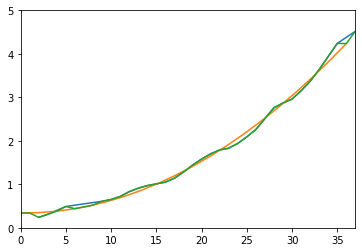

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

df = df.loc[df['location'] == 'United States']
df = df.reset_index(drop=True)
df = df.loc[df['date'] >= strcutoff]
df = df.loc[df['date'] <= datemax]

full_v_day = df['people_fully_vaccinated_per_hundred']
full_v_array = full_v_day.to_numpy()

# Need to impute NaN values
# Fit to quadratic curve and use that to get predicted value
fillx = []
filly = []

m = 0
for i in range(len(full_v_array)):
  if np.isnan(full_v_array[i]):
    m = i
    continue
  fillx.append(i)
  filly.append(full_v_array[i])

# Only need to fit the parts with NaN
fillx = fillx[:m + 1]
filly = filly[:m + 1]


res = np.polyfit(fillx, filly, 2)
spacex = np.linspace(0, m, 20)
spacey = spacex * spacex * res[0] + spacex * res[1] + res[2]
plt.plot(fillx, filly)
plt.plot(spacex, spacey)

for i in range(len(full_v_array)):
  if np.isnan(full_v_array[i]):
    full_v_array[i] = i * i * res[0] + i * res[1] + res[2]

plt.plot(full_v_array)
plt.xlim(0, m + 1)
plt.ylim(0, 5)
plt.show()



# Prep Time Series

In [ ]:
def timeprep(p_var_window, var_window, p_vac_window, vac_window, prop=0.8):
  time_features = []
  time_result = []

  for i in range(max(p_var_window + var_window, p_vac_window + vac_window), len(full_v_array)):
    features = []
    result = []
    var_start = i - (p_var_window + var_window - 1)
    for v in variant_props_time:
      cur = variant_props_time[v]
      for j in range(var_start, var_start + var_window):
        features.append(cur[j][1])
      result.append(cur[i][1])
    vac_start = i - (p_vac_window + vac_window)
    for j in range(vac_start, vac_start + vac_window):
      features.append(full_v_array[j])
    time_features.append(features)
    time_result.append(result)

  print(len(time_features[0]))
  print(len(time_features))
  print(len(time_result))

  time_features = np.array(time_features)
  time_result = np.array(time_result)

  train_size = int(prop * len(time_features))

  xtrain = time_features[:train_size, :]
  xtest = time_features[train_size:, :]

  ytrain = time_result[:train_size, :]
  ytest = time_result[train_size:, :]
  
  return xtrain, xtest, ytrain, ytest

# Train

15
108
108
0.04522017208836326


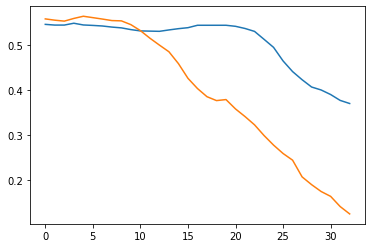

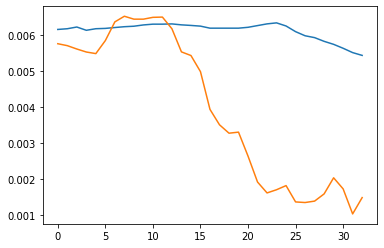

In [ ]:
xtrain, xtest, ytrain, ytest = timeprep(7, 4, 7, 3, prop=0.7)

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, max_depth=10)
regr.fit(xtrain, ytrain)
predict = regr.predict(xtest)

print(mean_absolute_error(predict, ytest))

for i in range(len(predicts[0])):
  plt.plot(predict[:, i])
  plt.plot(ytest[:, i])
  plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = timeprep(7, 7, 7, 7, prop=0.7)

from sklearn.ensemble import RandomForestRegressor

cur_trainx = xtrain
cur_trainy = ytrain
print(cur_trainx.shape)

predicts = []
for t in range(len(xtest)):
  regr = RandomForestRegressor(n_estimators=30, max_depth=7)
  regr.fit(cur_trainx, cur_trainy)
  predict = regr.predict([xtest[t]])
  predicts.append(predict[0])
  cur_trainx = np.vstack([cur_trainx, xtest[t]])
  cur_trainy = np.vstack([cur_trainy, ytest[t]])

predicts = np.array(predicts)

print(cur_trainy.shape)
print(mean_absolute_error(predicts, ytest))

28
105
105
(73, 28)
(105, 3)
0.015397159141782022


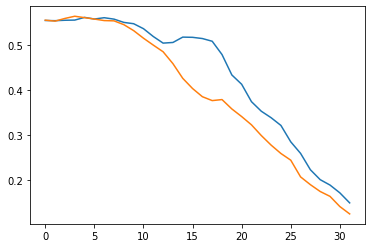

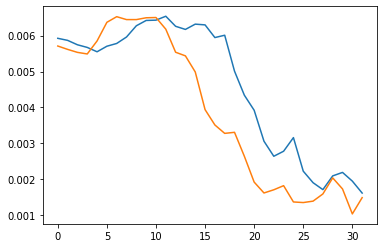

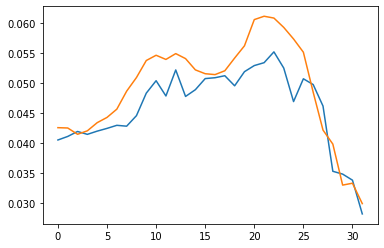

In [ ]:
for i in range(len(predicts[0])):
  plt.plot(predicts[:, i])
  plt.plot(ytest[:, i])
  plt.show()

# Test Multiple Week Prediction

In [ ]:
def prep(p_var_window, var_window, p_vac_window, vac_window, prop=0.8):
  time_features = []
  time_result = []

  for i in range(max(p_var_window + var_window, p_vac_window + vac_window), len(full_v_array)):
    features = []
    result = []
    var_start = i - (p_var_window + var_window - 1)

    for v in variant_props_time:
      cur = variant_props_time[v]
      build = []
      for j in range(var_start, var_start + var_window):
        build.append((j, cur[j][1]))
      features.append(build)
      result.append((i, cur[i][1]))

    
    vac_start = i - (p_vac_window + vac_window)
    build = []
    for j in range(vac_start, vac_start + vac_window):
      build.append((j, full_v_array[j]))
    features.append(build)
    time_features.append(features)
    time_result.append(result)

  time_features = np.array(time_features, dtype=object)
  time_result = np.array(time_result, dtype=object)

  train_size = int(prop * len(time_features))

  xtrain = time_features[:train_size, :]
  xtest = time_features[train_size:, :]

  ytrain = time_result[:train_size, :]
  ytest = time_result[train_size:, :]
  
  return xtrain, xtest, ytrain, ytest

def convert_to_rawx(data):
  build = []
  for l in data:
    build += [cur[-1] for cur in l]
  return np.array(build)

def convert_to_rawy(data):
  return np.array([cur[-1] for cur in data])

In [ ]:
xtrain, xtest, ytrain, ytest = prep(ahead, window, 7, 7, prop=0.7)
print(convert_to_rawy(ytest[0]))

[0.5559026  0.00570949 0.04255248]


In [ ]:
ahead = 1
window = 5
xtrain, xtest, ytrain, ytest = prep(ahead, window, 7, 7, prop=0.7)

from sklearn.ensemble import RandomForestRegressor

cur_trainx = np.array([convert_to_rawx(i) for i in xtrain])
cur_trainy = np.array([convert_to_rawy(i) for i in ytrain])

regr = RandomForestRegressor(n_estimators=30, max_depth=7)
regr.fit(cur_trainx, cur_trainy)


predicts = []
cur_window = xtest[0]
var_day = max([cur[0] for cur in cur_window[0]])
vac_day = max([cur[0] for cur in cur_window[-1]])

for t in range(len(xtest)):
  var_day += 1
  vac_day += 1

  next_point = convert_to_rawx(cur_window)
  predict = regr.predict([next_point])

  predicts.append((var_day, predict[0]))
  
  for i in range(len(cur_window) - 1):
    cur = cur_window[i]
    nxt = cur[1:] + [(var_day, predict[0][i])]
    cur_window[i] = nxt
  
  cur = cur_window[-1]
  nxt = cur[1:] + [(vac_day, full_v_array[vac_day])]
  cur_window[-1] = nxt

raw_predicts = np.array([cur[1] for cur in predicts])
raw_y = np.array([convert_to_rawy(cur) for cur in ytest])

print(mean_absolute_error(raw_predicts, raw_y))

0.057203583826942454


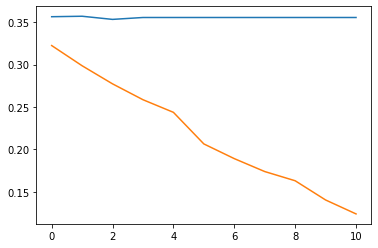

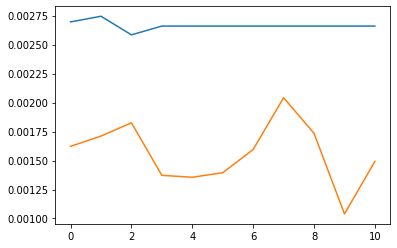

In [ ]:
for i in range(len(predicts[0])):
  plt.plot(raw_predicts[:, i])
  plt.plot(raw_y[:, i])
  plt.show()